This notebook was created to explore some videos with the intention of gaining a better understanding of the faces within the real/fake videos.

In [2]:
# https://github.com/ageitgey/face_recognition/blob/master/examples/find_faces_in_picture.py
# https://www.kaggle.com/c/deepfake-detection-challenge

from sklearn.metrics import log_loss
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import cv2 as cv
import os
import pandas as pd
plt.style.use('ggplot')
from IPython.display import Video
from IPython.display import HTML
from PIL import Image

import face_recognition

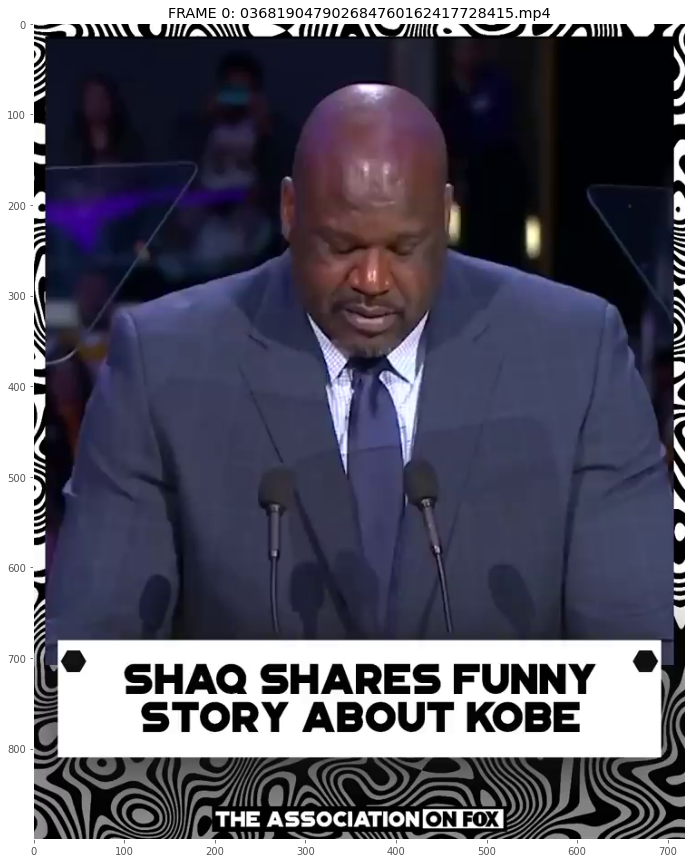

In [11]:
real_dir = 'Real/'
fig, ax = plt.subplots(1,1, figsize=(15, 15))
real_video_files = [real_dir + x for x in os.listdir(real_dir)]
video_file = real_video_files[0]
cap = cv.VideoCapture(video_file)
success, image = cap.read()
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
cap.release()   
ax.imshow(image)
ax.title.set_text(f"FRAME 0: {video_file.split('/')[-1]}")
plt.grid(False)

There are 1 face(s) in this image.
Pixel location Top: 53, Left: 53, Bottom: 182, Right: 182


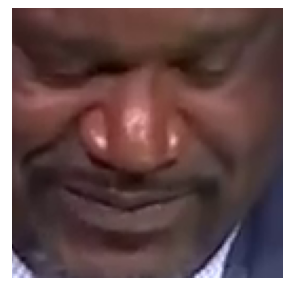

In [20]:
#Find coordinates of any face(s) in the image
face_coords = face_recognition.face_locations(image)

print("There are {} face(s) in this image.".format(len(face_locations)))

for face in face_coords:
    # Print the location of each face in this image
    top, right, bottom, left = face
    print("Pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    #Crop the face
    face_image = image[top:bottom, left:right]
    
    #Plot
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    plt.grid(False)
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.imshow(face_image)

In [23]:
#Extract all frames from the video_file
cap = cv.VideoCapture(video_file)

frames = []
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frames.append(frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()


print('The number of frames in file {} is {}.'.format(video_file, len(frames)))

The number of frames in file Real/036819047902684760162417728415.mp4 is 1041.


No face in frame 690
No face in frame 805


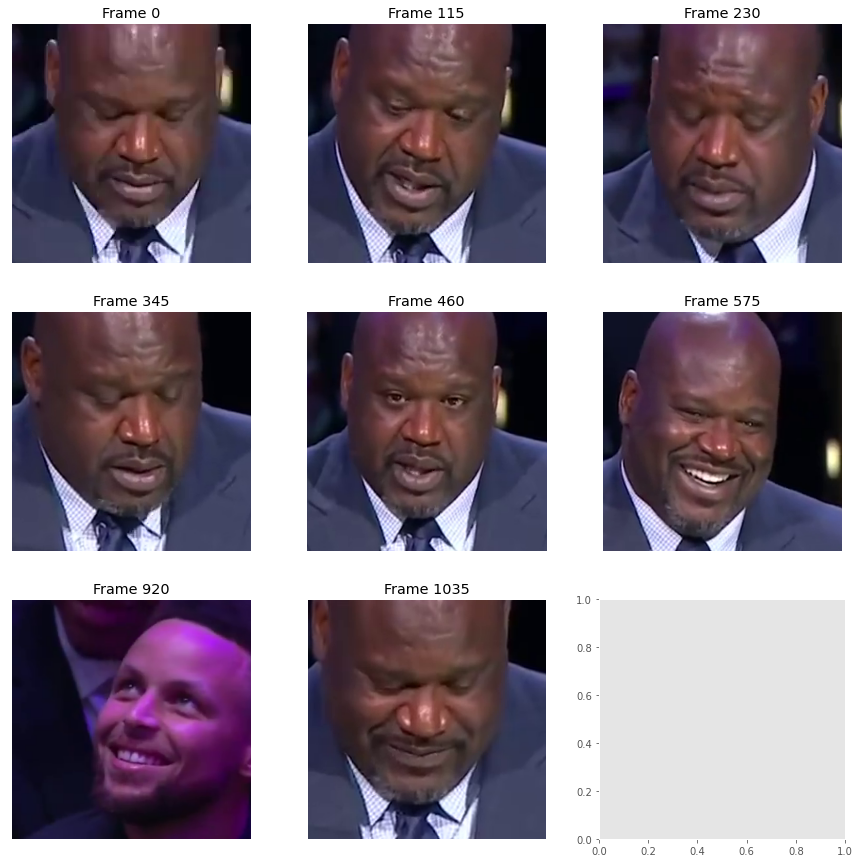

In [31]:
#Extract faces (if any) from randomly chosen frames from the video_file
#and plot in a grid below:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = np.array(axes)
axes = axes.reshape(-1)

ax_ix = 0

#Some padding around the face may be useful to a classification model
padding = 50

for i in range(0,len(frames),len(frames)//9):
    frame = frames[i]
    
    face_locations = face_recognition.face_locations(frame)
    if len(face_locations) == 0:
        print('No face in frame {}'.format(i))
        continue
    top, right, bottom, left = face_locations[0]
    frame_face = frame[top-padding:bottom+padding, left-padding:right+padding]
    image = cv.cvtColor(frame_face, cv.COLOR_BGR2RGB)
    axes[ax_ix].imshow(image)
    axes[ax_ix].xaxis.set_visible(False)
    axes[ax_ix].yaxis.set_visible(False)
    axes[ax_ix].set_title('Frame {}'.format(i))
    ax_ix += 1
    
plt.grid(False)
plt.show()